# Unimodal

In [1]:
import sys
sys.path.append('../')

In [2]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import cv2
from utils import circle_size, colors, toImg, preprocess
from model import loadFan#, predict_landmarks
from torchgeometry.contrib import spatial_soft_argmax2d
from glob import glob
import tifffile as tiff

In [3]:
def load_imgs(path):
    #get files with glob
    files = glob(f"{path}*")
    #sort files by number
    files = sorted(files, key=lambda x: int(x.split('/')[-1].split('.')[0]))
    #load images
    if files[0].endswith('.tif'):
        imgs = [tiff.imread(f) for f in files]
    else:
        imgs = [cv2.cvtColor(cv2.imread(f), cv2.COLOR_BGR2RGB) for f in files]
    return imgs


In [4]:
#You can download the dataset from here: https://figshare.com/projects/ELD/167318

In [5]:
#set your path here
PATH = "../../marcoAnalysis/"

## MOB HE imgs

In [6]:
inpath = f'{PATH}MOB_eggplant/'

In [7]:
#load imgs and move to tensor
mob_he = load_imgs(inpath)
image = torch.stack([preprocess(img) for img in mob_he])

You can can either train a model with:

```
python train.py --elastic_sigma 5 --cuda 1 --port 9006 --data_path ../marcoAnalysis/MOB_eggplant/ --npts 14 --o scratch --elastic True --step_size 5 --ws 0 --gamma 0.9 --model unimodal
```

Or download a test model at: https://figshare.com/projects/ELD/167318


In [8]:
#load model
fan = loadFan(npoints=14,n_channels=3,path_to_model="../models/unimodal/MOB_HE/model_110.fan.pth")

In [9]:
def predict_landmarks(fan, image):
    with torch.no_grad():
        #img = sample['Im']
        
        fan.eval()

        with torch.no_grad():
            pts = 4 * spatial_soft_argmax2d(fan(image.cuda()), False)
    return pts
        

In [10]:
#predict landmarks
pts = predict_landmarks(fan, image)
#combine landmarks and image
np_img = toImg(image.cuda()[:,:3], pts, 128)


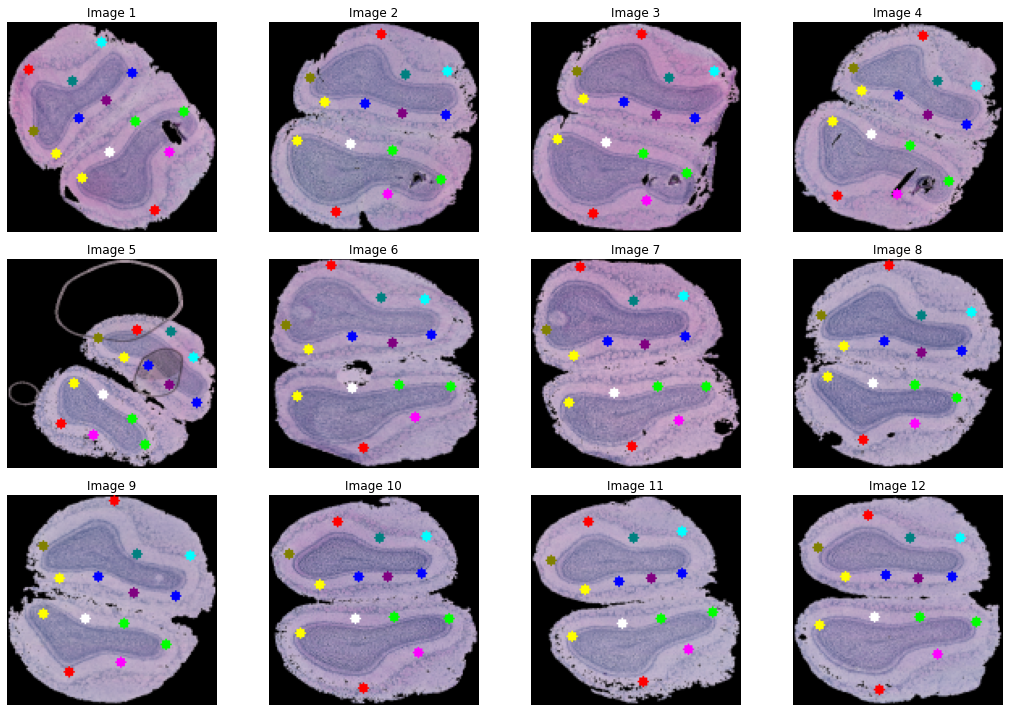

In [11]:
fig, axs = plt.subplots(3, 4, figsize=(15, 10))  # adjust the size as needed
axs = axs.ravel()

for i in range(12):
    img = np_img[i]
    axs[i].imshow(img)
    axs[i].set_title(f"Image {i+1}")
    axs[i].axis('off')  # to hide the axis

plt.tight_layout()
plt.show()


## MOB 3 gene data

In [12]:
inpath = f'{PATH}MOB_3d/'


In [13]:
#load imgs and move to tensor
mob_3d_imgs = load_imgs(inpath)
image = torch.stack([preprocess(img) for img in mob_3d_imgs])

You can can either train a model with:

```
python train.py --elastic_sigma 5 --cuda 1 --port 9006 --data_path ../marcoAnalysis/MOB_3d/ --npts 14 --o scratch --elastic True --step_size 5 --ws 0 --gamma 0.9 --model unimodal
```

Or download a test model at: https://figshare.com/projects/ELD/167318

In [14]:
#load model
fan = loadFan(npoints=14,n_channels=3,path_to_model="../models/unimodal/MOB_3d/model_120.fan.pth")

In [15]:
#predict landmarks
pts = predict_landmarks(fan, image)
#combine landmarks and image
np_img = toImg(image.cuda()[:,:3], pts, 128)

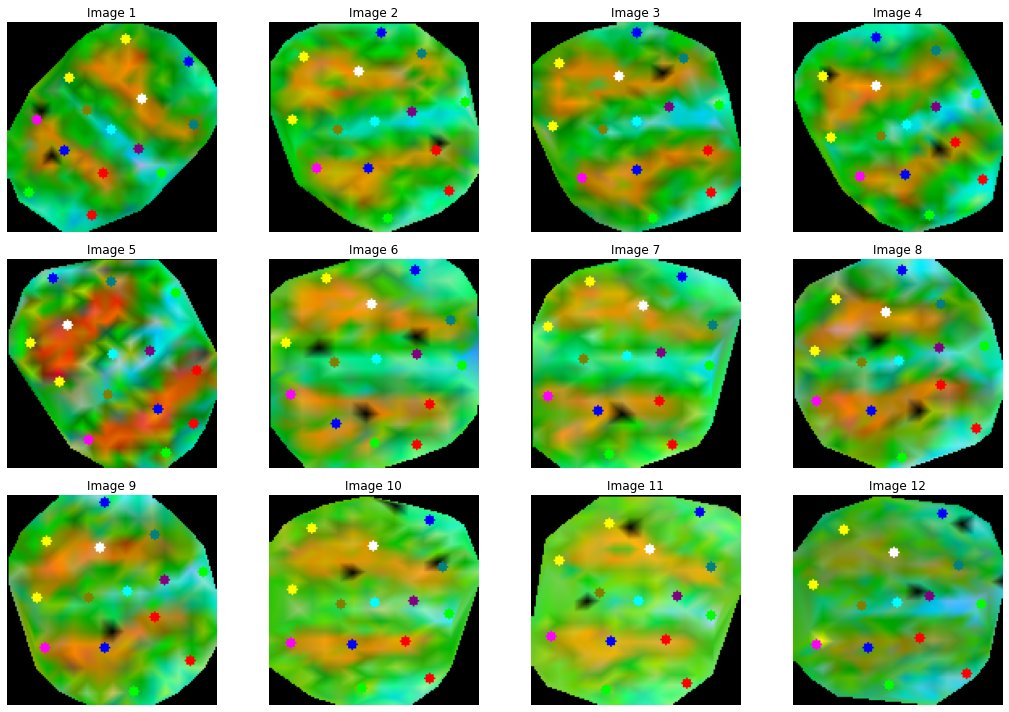

In [16]:
fig, axs = plt.subplots(3, 4, figsize=(15, 10))  # adjust the size as needed
axs = axs.ravel()

for i in range(12):
    img = np_img[i]
    axs[i].imshow(img)
    axs[i].set_title(f"Image {i+1}")
    axs[i].axis('off')  # to hide the axis

plt.tight_layout()
plt.show()


## MOB 100 genes

In [17]:
inpath = f'{PATH}MOB_100d/'

In [18]:
#load imgs and move to tensor
mob_100d_imgs = load_imgs(inpath)
image = torch.stack([preprocess(img) for img in mob_100d_imgs])

You can can either train a model with:

```
python train.py --elastic_sigma 5 --cuda 1 --port 9006 --data_path ../marcoAnalysis/MOB_100d/ --npts 14 --o scratch --elastic True --step_size 5 --ws 0 --gamma 0.9 --model unimodal
```

Or download a test model at: https://figshare.com/projects/ELD/167318

In [19]:
#load model
fan = loadFan(npoints=14,n_channels=100,path_to_model="../models/unimodal/MOB_100d/model_44.fan.pth")

In [20]:
#predict landmarks
pts = predict_landmarks(fan, image)
#combine landmarks and image
np_img = toImg(image.cuda()[:,:3], pts, 128)


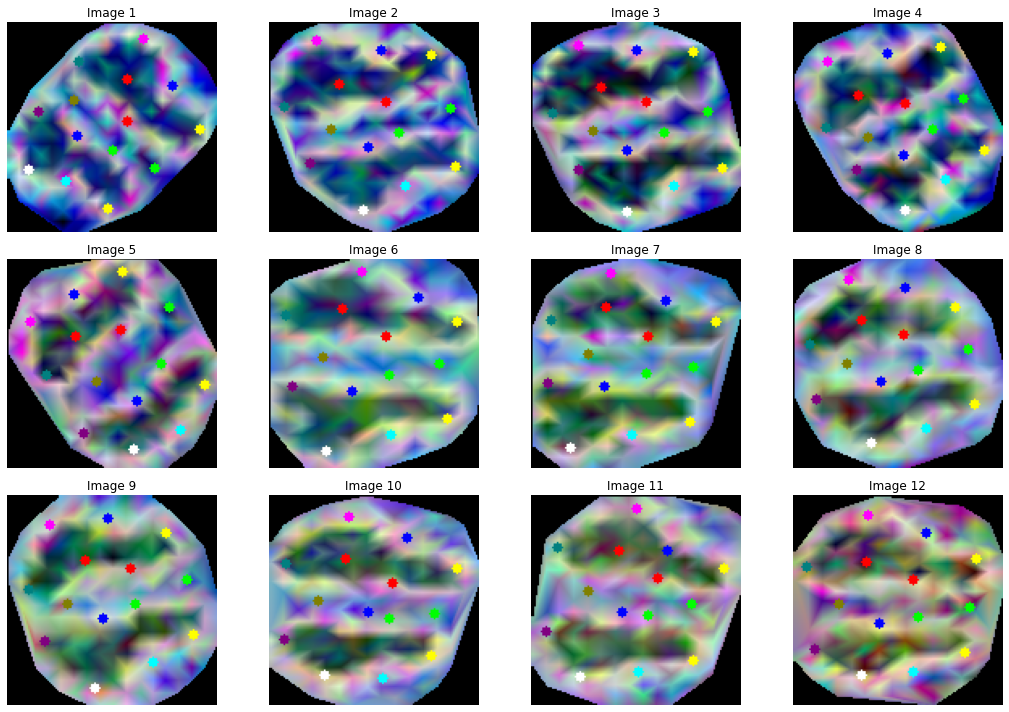

In [21]:
fig, axs = plt.subplots(3, 4, figsize=(15, 10))  # adjust the size as needed
axs = axs.ravel()

for i in range(12):
    img = np_img[i]
    axs[i].imshow(img)
    axs[i].set_title(f"Image {i+1}")
    axs[i].axis('off')  # to hide the axis

plt.tight_layout()
plt.show()


## ISS data

In [22]:
inpath = f'{PATH}paulo/'

In [23]:
#load imgs and move to tensor
iss_imgs = load_imgs(inpath)
image = torch.stack([preprocess(img) for img in iss_imgs])

You can can either train a model with:

```
python train.py --elastic_sigma 5 --cuda 1 --port 9006 --data_path ../marcoAnalysis/paulo/ --npts 40 --o scratch --elastic True --step_size 5 --ws 0 --gamma 0.9 --angle 0.1 --model unimodal
```

Or download a test model at: https://figshare.com/projects/ELD/167318

In [24]:
#load model
fan = loadFan(npoints=30,n_channels=3,path_to_model="../models/unimodal/iss/model_103.fan.pth")

In [25]:
#predict landmarks
pts = predict_landmarks(fan, image)
#combine landmarks and image
np_img = toImg(image.cuda()[:,:3], pts, 128)


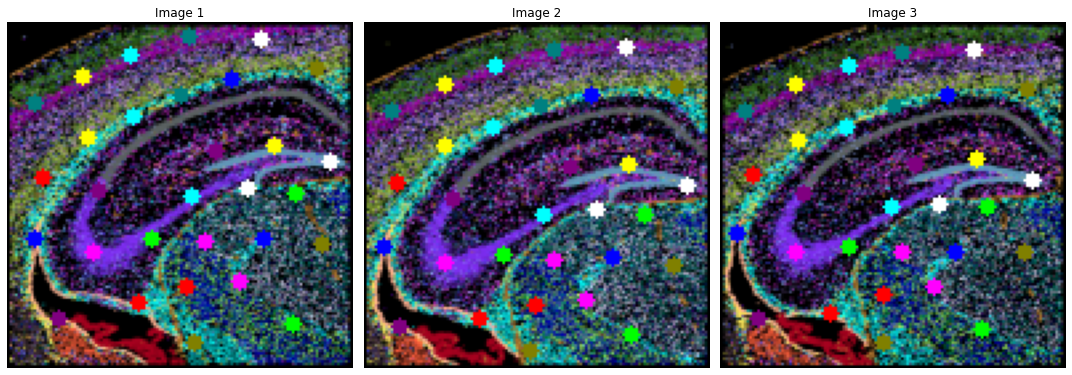

: 

In [26]:
fig, axs = plt.subplots(1,3, figsize=(15, 10))  # adjust the size as needed
axs = axs.ravel()

for i in range(3):
    img = np_img[i]
    axs[i].imshow(img)
    axs[i].set_title(f"Image {i+1}")
    axs[i].axis('off')  # to hide the axis

plt.tight_layout()
plt.show()
